### Data Processing :
* **Importing necessary libraries**
* **Loading the original data**
* **Check the total number of distinct values**
* **Check for duplicates**
* **Check for missing values**
* **Check for corrupted values**
* **Outliers Detection**
* **Feature Engineering**
    * ***Feature Selection***
    * ***Dropping unwanted features***
    * ***Independent and Dependent variable creation***
    * ***Train and Test split***
* **Export Train Data and Test Data**

#### Importing necessary libraries

In [55]:
#Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Encoding the data to find correlation
from sklearn.preprocessing import LabelEncoder

#Train and Test split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### Loading the original data 

In [14]:
#Loading the data
file_location = 'C:/Users/User/Desktop/E10901-PR2-V18_Certified Data Scientist - Project/data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
emp_performance = pd.read_excel(file_location)

#### Check the total number of distinct values

In [15]:
# Check the total number of distinct values and create lists for categorical and numerical columns
numerical_features = []
categorical_features = []
for i in emp_performance.columns:
    if(emp_performance[i].nunique() < 10) | (i in (emp_performance.describe(include='O').columns)):
        categorical_features.append(i)
        print(f'{i} - {emp_performance[i].nunique()} Distinct values - Categorical')
    else:
        numerical_features.append(i)
        print(f'{i} - {emp_performance[i].nunique()} Distinct values - Numerical')

EmpNumber - 1200 Distinct values - Categorical
Age - 43 Distinct values - Numerical
Gender - 2 Distinct values - Categorical
EducationBackground - 6 Distinct values - Categorical
MaritalStatus - 3 Distinct values - Categorical
EmpDepartment - 6 Distinct values - Categorical
EmpJobRole - 19 Distinct values - Categorical
BusinessTravelFrequency - 3 Distinct values - Categorical
DistanceFromHome - 29 Distinct values - Numerical
EmpEducationLevel - 5 Distinct values - Categorical
EmpEnvironmentSatisfaction - 4 Distinct values - Categorical
EmpHourlyRate - 71 Distinct values - Numerical
EmpJobInvolvement - 4 Distinct values - Categorical
EmpJobLevel - 5 Distinct values - Categorical
EmpJobSatisfaction - 4 Distinct values - Categorical
NumCompaniesWorked - 10 Distinct values - Numerical
OverTime - 2 Distinct values - Categorical
EmpLastSalaryHikePercent - 15 Distinct values - Numerical
EmpRelationshipSatisfaction - 4 Distinct values - Categorical
TotalWorkExperienceInYears - 40 Distinct valu

In [16]:
emp_performance.TrainingTimesLastYear.unique()

array([2, 1, 4, 5, 6, 3, 0], dtype=int64)

In [17]:
print(f'{len(categorical_features)} Categorical Features:\n {categorical_features} \n\n {len(numerical_features)} Numerical Features:\n {numerical_features}')

18 Categorical Features:
 ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'OverTime', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'Attrition', 'PerformanceRating'] 

 10 Numerical Features:
 ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Observations:
* We have 18 Categorical Features and 10 Numerical Features.
* High Cardinality Categorical features : EmpNumber with 1200 distinct values.
* Nominal Categorical features : Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole,BusinessTravelFrequency
* Ordinal Categorical features : EmpEducationLevel, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, OverTime, EmpRelationshipSatisfaction, TrainingTimesLastYear, EmpWorkLifeBalance, Attrition,PerformanceRating
* TrainingTimesLastYear is actually a numerical feature but as there are only 7 distinct values from 0 to 6 for 1200 employees, this is considered as categorical feature

#### Check for duplicates

In [18]:
''' Checking for total number of duplicates without considering EmpNumber feature as that feature is useless 
because of High Cardinality with 1200 distinct values'''
emp_performance[emp_performance.columns[1:]].duplicated().sum()

0

There are no duplicate rows present in the provided dataset

#### Check for missing values

In [19]:
# Checking whether there is any missing values 
emp_performance.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

There are no missing values present in the provided dataset

#### Check for corrupted values

In [20]:
# Check whether there is any Corrupted values in the dataset excluding EmpNumber feature
for col in emp_performance.describe(include='O').columns[1:]:print(f'{col} : {emp_performance[col].unique()}\n')

Gender : ['Male' 'Female']

EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']

MaritalStatus : ['Single' 'Married' 'Divorced']

EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']

EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']

BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

OverTime : ['No' 'Yes']

Attrition : ['No' 'Yes']



There are no corrupted values present in the dataset

#### Outliers Detection

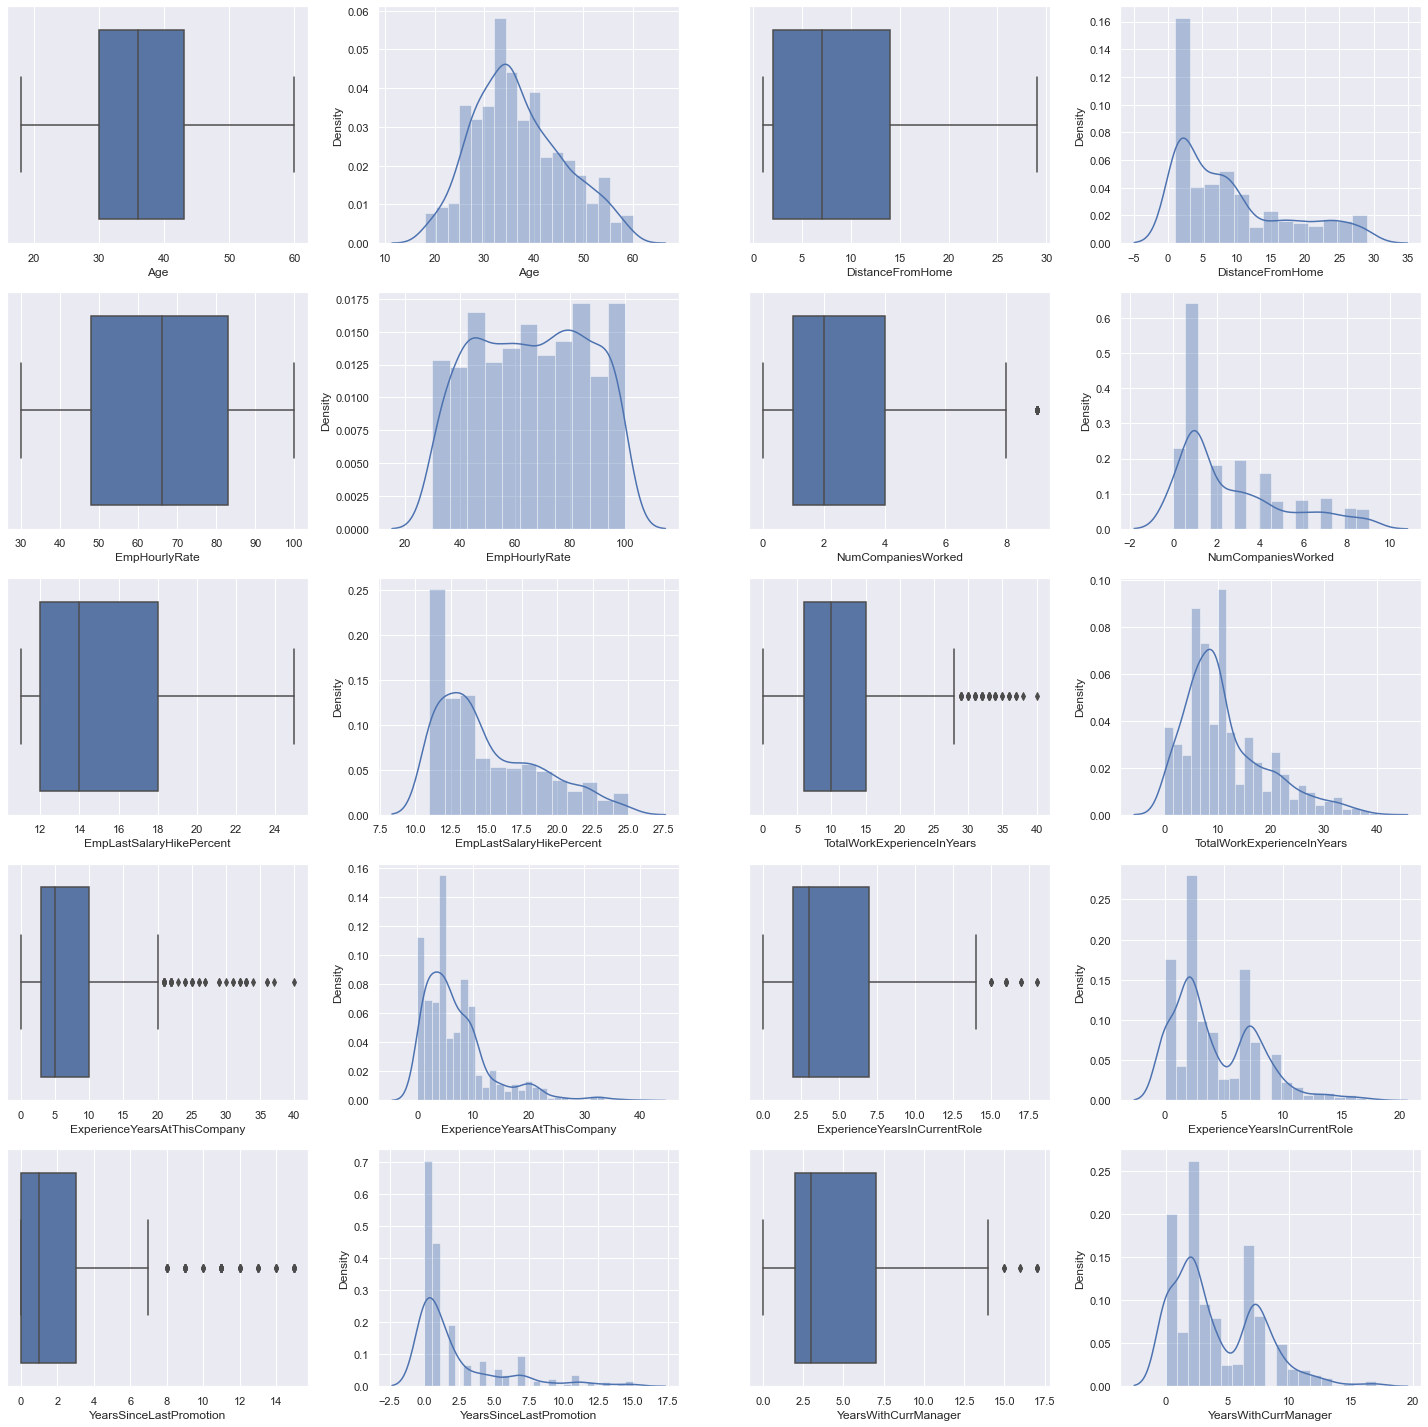

In [21]:
# Checking the outliers for numerical columns
plt.figure(figsize=(20,20))
plotnumber = 1
for column in numerical_features:
    ax = plt.subplot(5,4,plotnumber)
    sns.boxplot(emp_performance[column])
    plotnumber += 1
    ax = plt.subplot(5,4,plotnumber)
    sns.distplot(emp_performance[column])
    plotnumber += 1
plt.tight_layout()

In [22]:
# Outlier detection using IQR method and also to check skewness and kurtosis of the numerical columns
Q1_df = []
Q3_df = []
IQR_df = []
lower_limit_df = []
upper_limit_df = []
lower_total_rows = []
upper_total_rows =  []
skewness = []
kurtosis_ = []
for cols in numerical_features:
    Q1 = emp_performance[cols].quantile(0.25)
    Q1_df.append(Q1)
    Q3 = emp_performance[cols].quantile(0.75)
    Q3_df.append(Q3)
    IQR = Q3 - Q1
    IQR_df.append(IQR)
    lower_limit = Q1 - 1.5 * IQR
    lower_limit_df.append(lower_limit)
    upper_limit = Q3 + 1.5 * IQR
    upper_limit_df.append(upper_limit)
    below_lowerlimit_total_rows = (emp_performance[cols] < lower_limit).sum()
    lower_total_rows.append(below_lowerlimit_total_rows)
    above_upperlimit_total_rows = (emp_performance[cols] > upper_limit).sum()
    upper_total_rows.append(above_upperlimit_total_rows)
    skewness.append(skew(emp_performance[cols], axis=0, bias=True))
    kurtosis_.append(kurtosis(emp_performance[cols], axis=0, bias=True))
    
df_list = list(zip(Q1_df,Q3_df,IQR_df,lower_limit_df,lower_total_rows,upper_limit_df,upper_total_rows,skewness,kurtosis_))
df_outliers = pd.DataFrame(df_list,columns=['Q1','Q3','IQR','lower_limit','below_lower_limit_total_rows','upper_limit',\
                                            'above_upper_limit_total_rows','skewness','kurtosis'], index = numerical_features)
df_outliers

,Q1,Q3,IQR,lower_limit,below_lower_limit_total_rows,upper_limit,above_upper_limit_total_rows,skewness,kurtosis
Age,30.0,43.0,13.0,10.5,0,62.5,0,0.383665,-0.434202
DistanceFromHome,2.0,14.0,12.0,-16.0,0,32.0,0,0.961752,-0.246005
EmpHourlyRate,48.0,83.0,35.0,-4.5,0,135.5,0,-0.035121,-1.186947
NumCompaniesWorked,1.0,4.0,3.0,-3.5,0,8.5,39,1.047324,0.063581
EmpLastSalaryHikePercent,12.0,18.0,6.0,3.0,0,27.0,0,0.807642,-0.303489
TotalWorkExperienceInYears,6.0,15.0,9.0,-7.5,0,28.5,51,1.085503,0.797285
ExperienceYearsAtThisCompany,3.0,10.0,7.0,-7.5,0,20.5,56,1.786818,4.036075
ExperienceYearsInCurrentRole,2.0,7.0,5.0,-5.5,0,14.5,16,0.887048,0.431210
YearsSinceLastPromotion,0.0,3.0,3.0,-4.5,0,7.5,88,1.972462,3.519355
YearsWithCurrManager,2.0,7.0,5.0,-5.5,0,14.5,11,0.812141,0.142589


In [23]:
# Checking the total number of outliers found by IQR method
total_outliers = df_outliers['below_lower_limit_total_rows'].sum() + df_outliers['above_upper_limit_total_rows'].sum()
print('Total number of outliers : ',total_outliers)
print('We have {:.2f}% of data with outliers'.format(total_outliers/emp_performance.shape[0]*100))

Total number of outliers :  261
We have 21.75% of data with outliers


In [24]:
# Checking positively skewed and negatively skewed columns
positively_skewed= df_outliers[(df_outliers['skewness'] > 0.5)].index
negatively_skewed = df_outliers[(df_outliers['skewness'] < -0.5)].index
print(f'Positively Skewed Features: {positively_skewed}\n\nNegatively Skewed Features: {negatively_skewed}')

Positively Skewed Features: Index(['DistanceFromHome', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Negatively Skewed Features: Index([], dtype='object')


* Positively Skewed features will be handled using Square Root Transformation.
* Column Transformer is used to transform the positively skewed features to be used in Model Pipeline.

#### Feature Engineering

##### Feature Selection

Let's look into the highly correlated features and compare their correlation with Target PerformanceRating to decide which features need to be eliminated

<AxesSubplot:>

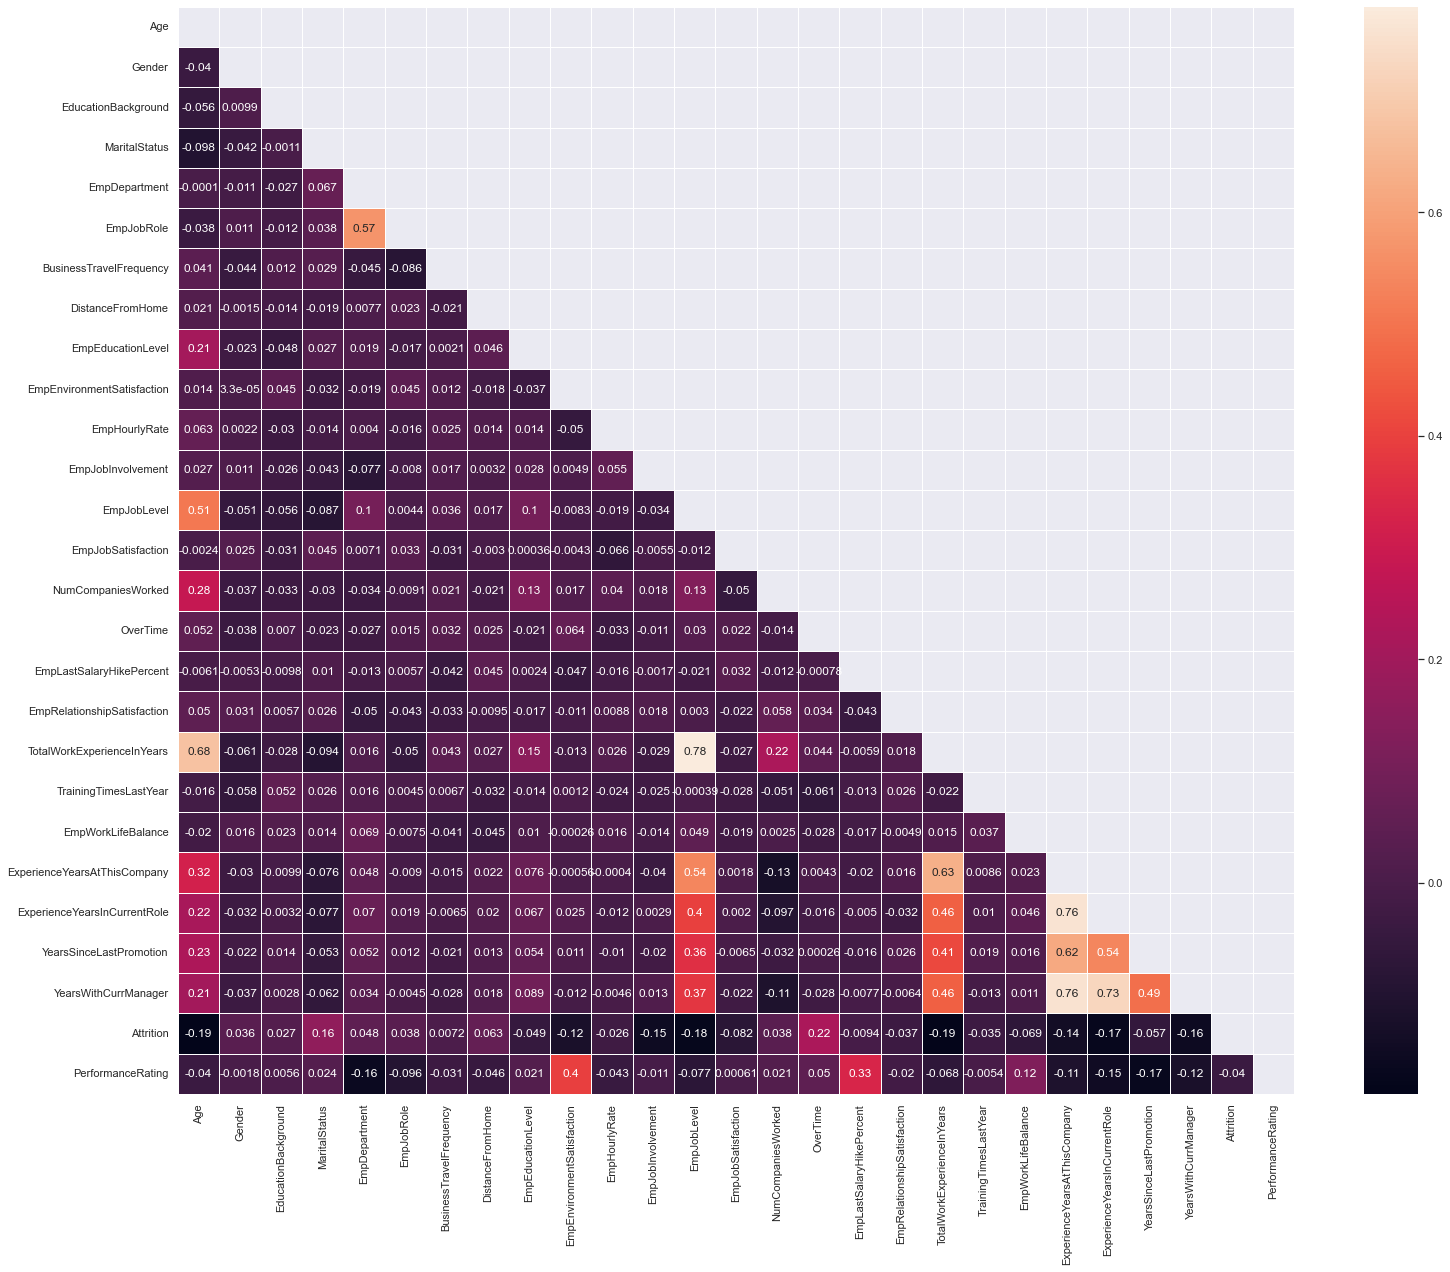

In [25]:
# Creating a new dataframe to check correlation in the dataset by applying LabelEncoder for the columns with datatype object
corr_df = emp_performance[emp_performance.columns[1:]] # Excluding EmpNumber feature
corr_df[emp_performance.describe(include='O').columns[1:]] = corr_df[emp_performance.describe(include='O').columns[1:]].apply(LabelEncoder().fit_transform)
plt.rcParams["figure.figsize"] = (25,20)
sns.heatmap(corr_df.corr(),annot=True, linewidths= .8, mask = np.triu(np.ones_like(corr_df.corr())))

Observations:
* TotalWorkExperienceInYears vs EmpJobLevel - 78% correlation - TotalWorkExperienceInYears column can be eliminated as EmpJobLevel column has higher correlation with target (PerformanceRating) than TotalWorkExperienceInYears column
* ExperienceYearsInCurrentRole vs ExperienceYearsAtThisCompany - 76% correlation - ExperienceYearsAtThisCompany can be eliminated as ExperienceYearsInCurrentRole has higher correlation with target (PerformanceRating) than TotalWorkExperienceInYears column
* YearsWithCurrManager vs ExperienceYearsAtThisCompany - 76% correlation - ExperienceYearsAtThisCompany column can be eliminated and YearsWithCurrManager column has higher correlation with target (PerformanceRating) than ExperienceYearsAtThisCompany column
* YearsWithCurrManager vs ExperienceYearsInCurrentRole - 73% correlation - YearsWithCurrManager can be eliminated as ExperienceYearsInCurrentRole column column has higher correlation with target (PerformanceRating) than YearsWithCurrManager column

By considering the above observations,
TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, YearsWithCurrManager can be eliminated

In [26]:
performance_rating_Corr_df = pd.DataFrame(corr_df.corr().loc['PerformanceRating']).sort_values(by='PerformanceRating',ascending=False)
# Remove the features which can be eliminated
performance_rating_Corr_df.drop(['TotalWorkExperienceInYears', 
                                 'ExperienceYearsAtThisCompany', 
                                 'YearsWithCurrManager'], inplace = True)

In [27]:
performance_rating_Corr_df.query('(PerformanceRating > -0.01 & PerformanceRating < 0.01)').index

Index(['EducationBackground', 'EmpJobSatisfaction', 'Gender',
       'TrainingTimesLastYear'],
      dtype='object')

As these columns have less than 1% correlation(positive/negative), these columns can be eliminated

In [28]:
performance_rating_Corr_df.query('(PerformanceRating > 0.04 & PerformanceRating < 1)  | PerformanceRating < -0.04 ')

,PerformanceRating
EmpEnvironmentSatisfaction,0.395561
EmpLastSalaryHikePercent,0.333722
EmpWorkLifeBalance,0.124429
OverTime,0.050206
Age,-0.040164
EmpHourlyRate,-0.043116
DistanceFromHome,-0.046142
EmpJobLevel,-0.076632
EmpJobRole,-0.096209
ExperienceYearsInCurrentRole,-0.147638


These are the features which have correlation more than 4%

Correlation Observations :
* Top 3 Important Factors effecting employee performance - 
    * EmpEnvironmentSatisfaction - 39.56% correlation with PerformanceRating
    * EmpLastSalaryHikePercent - 33.37% correlation with PerformanceRating
    * YearSinceLastPromotion - 16.76% negatively correlated with PerformanceRating
* These columns are eliminated based on correlation:
    * TotalWorkExperienceInYears
    * ExperienceYearsAtThisCompany
    * YearsWithCurrManager 
    * EducationBackground - Less than 1% correlation with PerformanceRating
    * EmpJobSatisfaction - Less than 1% correlation with PerformanceRating
    * Gender - Less than 1% correlation with PerformanceRating
    * TrainingTimesLastYear'- Less than 1% correlation with PerformanceRating

##### Dropping unwanted Features

In [29]:
# Dropping unwanted features EmpNumber and columns identified based on correlation
column_to_drop = ['EmpNumber','TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'YearsWithCurrManager',
                 'EducationBackground', 'EmpJobSatisfaction', 'Gender','TrainingTimesLastYear']
df = emp_performance.drop(column_to_drop,axis=1)

In [30]:
df.shape

(1200, 20)

In [31]:
df.columns

Index(['Age', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   MaritalStatus                 1200 non-null   object
 2   EmpDepartment                 1200 non-null   object
 3   EmpJobRole                    1200 non-null   object
 4   BusinessTravelFrequency       1200 non-null   object
 5   DistanceFromHome              1200 non-null   int64 
 6   EmpEducationLevel             1200 non-null   int64 
 7   EmpEnvironmentSatisfaction    1200 non-null   int64 
 8   EmpHourlyRate                 1200 non-null   int64 
 9   EmpJobInvolvement             1200 non-null   int64 
 10  EmpJobLevel                   1200 non-null   int64 
 11  NumCompaniesWorked            1200 non-null   int64 
 12  OverTime                      1200 non-null   object
 13  EmpLastSalaryHikeP

##### Independent and Dependent variable creation

In [33]:
X = df.iloc[:,:-1] # Independent variable
y = df.PerformanceRating # Dependent variable

In [34]:
print(f'We have {X.shape[1]} columns: \n{X.columns}')

We have 19 columns: 
Index(['Age', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'Attrition'],
      dtype='object')


##### Train and Test split 

In [35]:
## creating training and testing data using stratified splitting as this is classification problem
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.2,stratify=y)

In [36]:
X_train.head()

,Age,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition
437,28,Single,Sales,Sales Executive,Travel_Frequently,7,3,3,55,3,2,0,No,14,4,3,2,1,No
1091,25,Single,Sales,Sales Executive,Travel_Rarely,4,2,2,99,2,2,1,Yes,11,2,3,4,1,No
327,25,Single,Research & Development,Research Scientist,Travel_Rarely,1,3,4,40,3,1,1,No,18,4,2,2,2,No
576,31,Married,Sales,Sales Executive,Travel_Rarely,5,3,1,51,3,2,1,No,19,3,3,2,0,No
1078,30,Married,Sales,Sales Representative,Travel_Rarely,2,1,3,72,3,1,1,No,18,1,3,0,0,No


In [37]:
y_train

437     3
1091    2
327     3
576     4
1078    3
       ..
323     3
1168    3
118     3
150     3
651     4
Name: PerformanceRating, Length: 960, dtype: int64

In [41]:
X_test.head()

,Age,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition
811,35,Married,Development,Business Analyst,Travel_Rarely,23,4,3,30,3,1,3,Yes,15,3,3,2,2,No
1149,26,Single,Development,Developer,Travel_Rarely,24,3,3,66,1,1,1,Yes,18,2,1,0,0,Yes
662,36,Married,Sales,Sales Executive,Travel_Rarely,17,2,3,33,2,2,2,No,16,3,1,2,1,No
542,53,Married,Finance,Finance Manager,Travel_Rarely,24,4,2,48,4,3,3,No,15,3,3,3,1,No
858,34,Divorced,Development,Business Analyst,Travel_Rarely,6,4,3,45,2,2,6,No,15,3,3,0,0,No


In [45]:
y_test

811     3
1149    3
662     2
542     2
858     3
       ..
623     2
580     3
147     3
798     3
208     2
Name: PerformanceRating, Length: 240, dtype: int64

In [46]:
X_train.shape,X_test.shape

((960, 19), (240, 19))

In [47]:
y_train.value_counts(),y_test.value_counts()

(3    699
 2    155
 4    106
 Name: PerformanceRating, dtype: int64,
 3    175
 2     39
 4     26
 Name: PerformanceRating, dtype: int64)

Text(0.5, 1.0, 'Training Data - Target distributions')

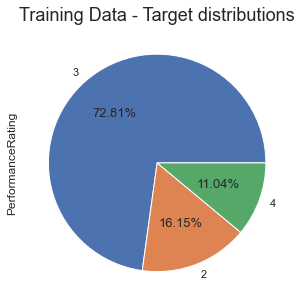

In [48]:
# Plotting pie chart for y_train distribution of PerformanceRating
plt.rc('font', size=13) 
plt.rcParams["figure.figsize"] = (5,5)
y_train.value_counts().plot(kind='pie',autopct = '%0.2f%%')
plt.title("Training Data - Target distributions",fontsize=18)

We will oversample the training data using SMOTE sampling technique and see how the model is performing

#### Export Train Data and Test Data

In [49]:
# Train data creation
train_data = X_train
train_data['PerformanceRating'] = y_train

# Test data creation
test_data = X_test
test_data['PerformanceRating'] = y_test

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 437 to 651
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           960 non-null    int64 
 1   MaritalStatus                 960 non-null    object
 2   EmpDepartment                 960 non-null    object
 3   EmpJobRole                    960 non-null    object
 4   BusinessTravelFrequency       960 non-null    object
 5   DistanceFromHome              960 non-null    int64 
 6   EmpEducationLevel             960 non-null    int64 
 7   EmpEnvironmentSatisfaction    960 non-null    int64 
 8   EmpHourlyRate                 960 non-null    int64 
 9   EmpJobInvolvement             960 non-null    int64 
 10  EmpJobLevel                   960 non-null    int64 
 11  NumCompaniesWorked            960 non-null    int64 
 12  OverTime                      960 non-null    object
 13  EmpLastSalaryHikeP

In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 811 to 208
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           240 non-null    int64 
 1   MaritalStatus                 240 non-null    object
 2   EmpDepartment                 240 non-null    object
 3   EmpJobRole                    240 non-null    object
 4   BusinessTravelFrequency       240 non-null    object
 5   DistanceFromHome              240 non-null    int64 
 6   EmpEducationLevel             240 non-null    int64 
 7   EmpEnvironmentSatisfaction    240 non-null    int64 
 8   EmpHourlyRate                 240 non-null    int64 
 9   EmpJobInvolvement             240 non-null    int64 
 10  EmpJobLevel                   240 non-null    int64 
 11  NumCompaniesWorked            240 non-null    int64 
 12  OverTime                      240 non-null    object
 13  EmpLastSalaryHikeP

In [54]:
#Exporting the Train Data and Test Data
export_file_location = 'C:/Users/User/Desktop/E10901-PR2-V18_Certified Data Scientist - Project/data/processed/'

train_data.to_csv(export_file_location +'train_data.csv')
test_data.to_csv(export_file_location +'test_data.csv')

### Summary

***Importing necessary libraries***
* pandas
* numpy
* Visualizations using matplotlib and seaborn
* Label Encoder Technique from sklearn to encode the data to find correlation
* Train and Test split using train_test_split from sklearn

***Loading the original data***
* Original data is loaded from the file location data-> raw -> INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls

***Check the total number of distinct values***
* We have 18 Categorical Features and 10 Numerical Features.
* High Cardinality Categorical features : EmpNumber with 1200 distinct values.
* Nominal Categorical features : Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole,BusinessTravelFrequency
* Ordinal Categorical features : EmpEducationLevel, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, OverTime, EmpRelationshipSatisfaction, TrainingTimesLastYear, EmpWorkLifeBalance, Attrition,PerformanceRating
* TrainingTimesLastYear is actually a numerical feature but as there are only 7 distinct values from 0 to 6 for 1200 employees, this is considered as categorical feature

***Check for duplicates***
* There are no duplicate rows present in the provided dataset

***Check for missing values***
* There are no missing values present in the provided dataset

***Check for corrupted values***
* There are no corrupted values present in the dataset

***Outliers Detection***
* Checked for outliers for numerical columns by plotting seaborn boxplot and distplot.
* Outliers detection using IQR method and also to check skewness and kurtosis. 
	* 21.75%(261) of data with outliers detected using IQR method
	* Identified positively skewed columns : DistanceFromHome, NumCompaniesWorked, EmpLastSalaryHikePercent, TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

***Feature Engineering***
* ***Feature Selection***
    * Columns with datatype Objects are encoded using LabelEncoder to check correlation
    * Checked for correlation and identified columns to be eliminated.
        * TotalWorkExperienceInYears vs EmpJobLevel - 78% correlation - TotalWorkExperienceInYears column can be eliminated as EmpJobLevel column has higher correlation with target (PerformanceRating) than TotalWorkExperienceInYears column.
        * ExperienceYearsInCurrentRole vs ExperienceYearsAtThisCompany - 76% correlation - ExperienceYearsAtThisCompany can be eliminated as ExperienceYearsInCurrentRole has higher correlation with target (PerformanceRating) than TotalWorkExperienceInYears column.
        * YearsWithCurrManager vs ExperienceYearsAtThisCompany - 76% correlation - ExperienceYearsAtThisCompany column can be eliminated and YearsWithCurrManager column has higher correlation with target (PerformanceRating) than ExperienceYearsAtThisCompany column.
        * YearsWithCurrManager vs ExperienceYearsInCurrentRole - 73% correlation - YearsWithCurrManager can be eliminated as ExperienceYearsInCurrentRole column column has higher correlation with target (PerformanceRating) than YearsWithCurrManager column.
        * Features having less than 1% correlation(positive/negative), these columns can be eliminated
    * These columns are eliminated based on correlation:
        * TotalWorkExperienceInYears
        * ExperienceYearsAtThisCompany
        * YearsWithCurrManager 
        * EducationBackground - Less than 1% correlation with PerformanceRating
        * EmpJobSatisfaction - Less than 1% correlation with PerformanceRating
        * Gender - Less than 1% correlation with PerformanceRating
        * TrainingTimesLastYear'- Less than 1% correlation with PerformanceRating
    * Identified Top 3 Important Factors effecting employee performance - 
        * EmpEnvironmentSatisfaction - 39.56% correlation with PerformanceRating
        * EmpLastSalaryHikePercent - 33.37% correlation with PerformanceRating
        * YearSinceLastPromotion - 16.76% negatively correlated with PerformanceRating

***Dropping unwanted features***
* Features that can be eliminated identified based on correlation have been dropped from the dataframe.

***Independent and Dependent variable creation***
* Creating X as independent variable and y as dependent variable.

***Train and Test split***
* Original data is splitted into X_train,y_train,X_test and y_test using train_test_split
* Train data - X_train(independent variable),y_train(dependent variable)
* Test data - X_test(independent variable),y_test(dependent variable)

***Export Train Data and Test Data***
* Export the train data and test data to processed folder using pandas